In [5]:
import numpy as np 
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt


In [ ]:
'''SMC sampler for a 4-D gaussian mixture. Uses the simple M-H m-kernel. Details identical to smc_banana.ipynb'''

'SMC sampler for a 4-D gaussian mixture. Uses the simple M-H m-kernel. Details identical to smc_banan.ipynb'

In [7]:
rng = np.random.default_rng()

mvn_1 = multivariate_normal(np.array([4 ,0, 4, 4]),np.eye(4))
mvn_2 = multivariate_normal(np.array([0, 4, 0, 0]),np.eye(4))
mvn_3 = multivariate_normal(np.array([-4, 0, 4, 0]),np.eye(4))
mvn_4 = multivariate_normal(np.array([0, -4, 0, 4]),np.eye(4))


def P(X:np.array):
    return mvn_1.pdf(X) + mvn_2.pdf(X) + mvn_3.pdf(X) + mvn_4.pdf(X)

##Define the sequence of intermediate targets
beta_t = np.linspace(0,1,20)


In [8]:
##Algorithm

#Initial proposal particles
N = 10000
particles = rng.multivariate_normal(np.array([0,0,0,0]),np.eye(4),size = (N,))
weights = 1/N * np.ones(N)

beta_t1 = 0
for t,beta in enumerate(beta_t[1:]):

    #Resampling step
    indices = rng.choice(np.arange(N),size = N,replace = True, p = weights)
    particles = particles[indices,:]

    old_particles = particles.copy()

    sub_steps = 20
    scale_param = 1.0
    #Mutation/M-Kernel step
    #MCMC step targeting the intermediate distribution of interest P**beta
    for step in range(sub_steps):
        for p in particles: 
            proposal = p + scale_param * rng.multivariate_normal(np.zeros(4),np.eye(4))
            A = (P(proposal)**beta) - (P(p)**beta)
            if(A >= 0):
                p = proposal 
            else: 
                u = rng.uniform(0.,1.)
                if(np.log(u) < A): 
                    p = proposal

    
    #Compute weights
    weights = (P(old_particles)**beta)/(P(old_particles)**beta_t1)

    # #Normalize weights
    weights = weights/np.sum(weights)

    # #Track the previous beta
    beta_t1 = beta

KeyboardInterrupt: 

In [ ]:
indices = rng.choice(np.arange(N),size = N,replace = True, p = weights)
particles = particles[indices,:]

mean_estimate = np.mean(particles,axis = 0)
cov_estimate = np.cov(particles.T)

print(f"Estimate of the mean: {mean_estimate}")
print(f"Estimate of the Cov: {cov_estimate}")

Estimate of the mean: [0.60161211 0.61376118 1.86705141 1.87004138]
Estimate of the Cov: [[ 7.57804267 -0.24742525  0.79965496  3.46801792]
 [-0.24742525  7.90880865 -1.10278121 -3.5323522 ]
 [ 0.79965496 -1.10278121  4.47579537  0.86200449]
 [ 3.46801792 -3.5323522   0.86200449  4.25425672]]


(100, 100, 100, 100)


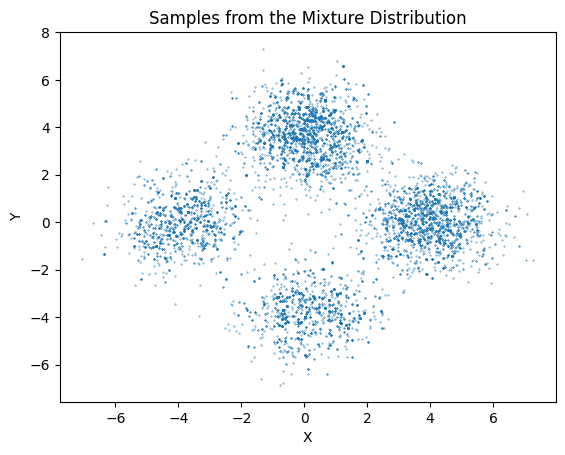

In [ ]:
plt.title('Samples from the Mixture Distribution')
plt.xlabel('X')
plt.ylabel('Y')

plt.scatter(particles[:,0],particles[:,1],s = 0.1)

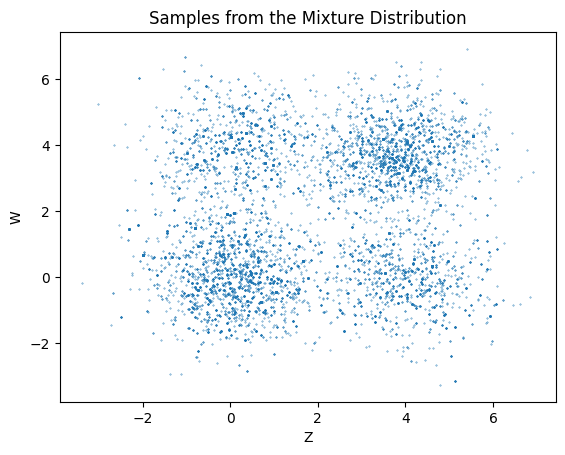

In [ ]:
plt.title('Samples from the Mixture Distribution')
plt.xlabel('Z')
plt.ylabel('W')

plt.scatter(particles[:,2],particles[:,3],s = 0.1)